In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
# Data Cleaner

def CleanData(df):
  df['max_cycle'] = df['id'].map(df.groupby('id')['cycle'].max())
  df['remaining_cycle'] = df['max_cycle'] - df['cycle']
  df.drop('max_cycle', axis=1, inplace=True)

  return df


In [47]:
# Bin Creator

def CreateBin(df):
  bins = np.arange(0, 10000, 30)
  labels = range(len(bins)-1)

  df['remaining_cycle_bin'] = pd.cut(df['remaining_cycle'], bins=bins, labels=labels, include_lowest=True, right=True)
  df.drop('remaining_cycle', axis=1, inplace=True)

  return df

In [48]:
column_names = ['id', 'cycle',
                'os1', 'os2', 'os3'] + \
               [f's{i}' for i in range(1, 22)]

# FD001

In [49]:
dfFD001 = pd.read_csv('/content/drive/MyDrive/UOM/Advanced AI/train_FD001.txt', sep='\s+', header=None, names=column_names)

In [50]:
dfFD001

,id,cycle,os1,os2,os3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [51]:
dfFD001 = CleanData(dfFD001)

In [52]:
dfFD001 = CreateBin(dfFD001)

In [53]:
dfFD001

,id,cycle,os1,os2,os3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,remaining_cycle_bin
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,6
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,6
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,6
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,6
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,0
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,0
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,0
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,0


In [54]:
dfFD001.shape

(20631, 27)

In [55]:
X = dfFD001.drop(columns=['remaining_cycle_bin'])  # features
y = dfFD001['remaining_cycle_bin']                 # target labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=500, max_depth=15, random_state=42)

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

# 7. Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5515347334410339

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       875
           1       0.64      0.64      0.64       894
           2       0.45      0.57      0.51       863
           3       0.44      0.45      0.44       939
           4       0.47      0.51      0.49       930
           5       0.49      0.58      0.53       754
           6       0.49      0.44      0.46       482
           7       0.76      0.13      0.23       234
           8       0.68      0.20      0.31       126
           9       1.00      0.03      0.07        58
          10       1.00      0.08      0.15        25
          11       0.00      0.00      0.00        10

    accuracy                           0.55      6190
   macro avg       0.61      0.37      0.39      6190
weighted avg       0.57      0.55      0.54      6190


Confusion Matrix:
 [[748 124   3   0   0   0   0   0   0   0   0   0]
 [ 91 57

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


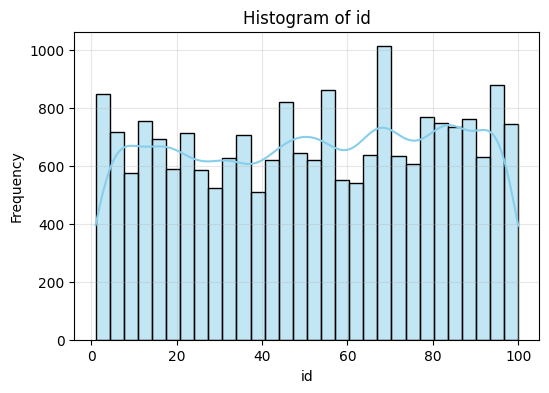

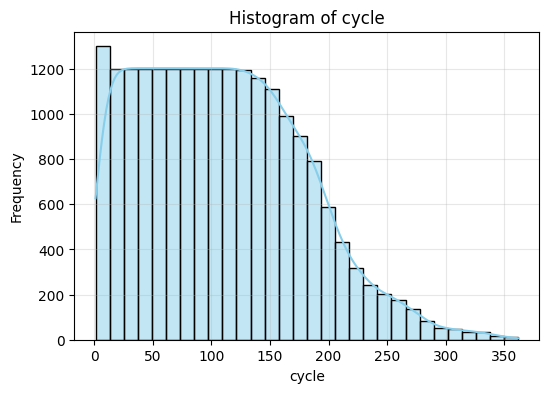

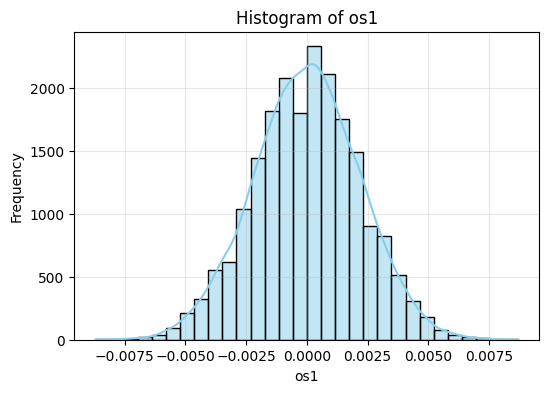

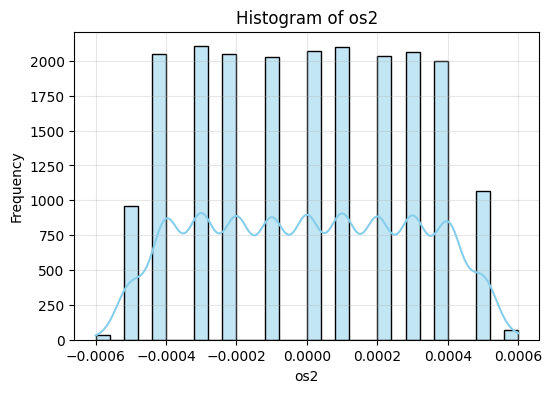

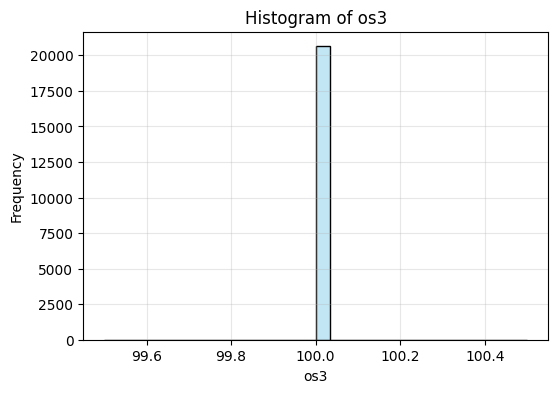

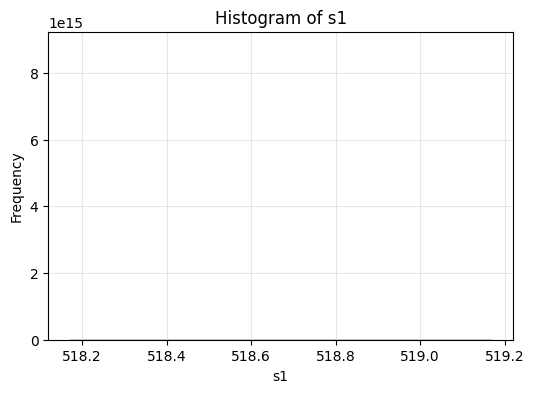

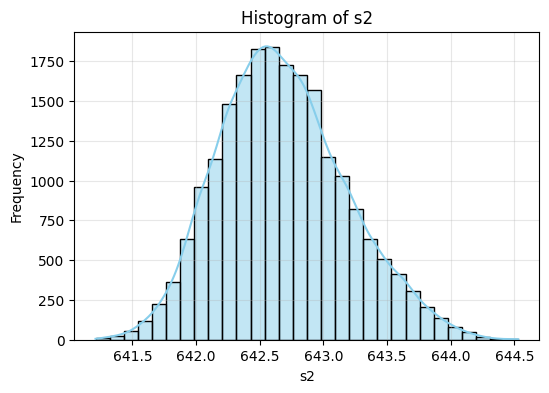

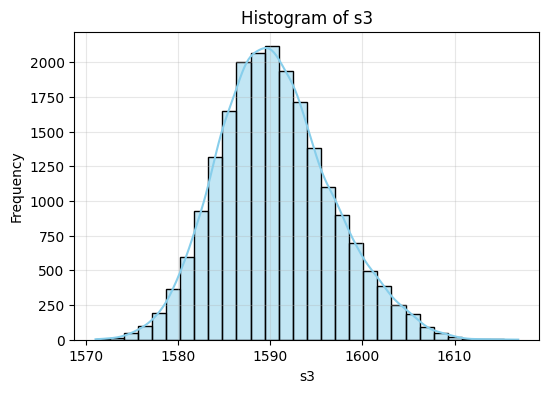

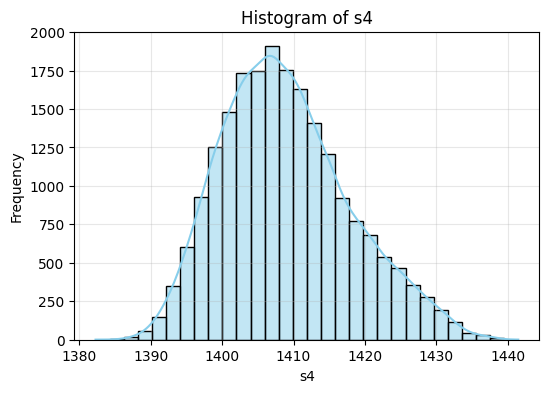

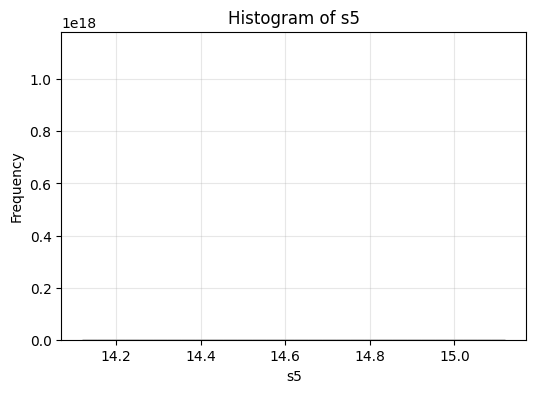

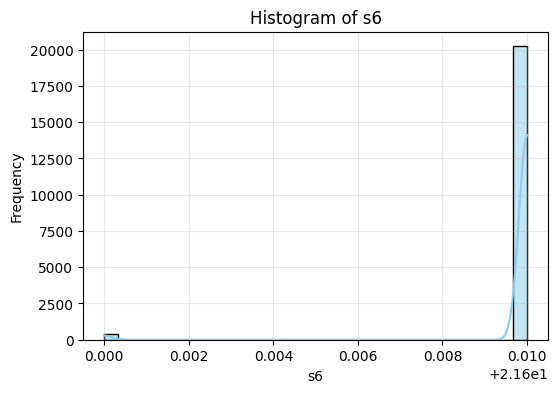

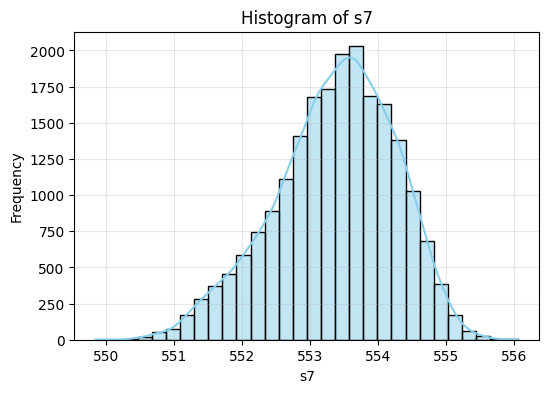

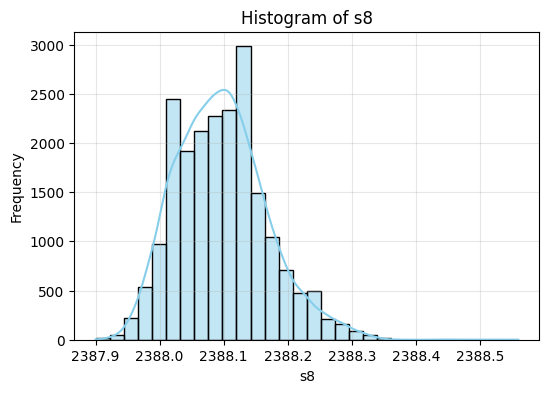

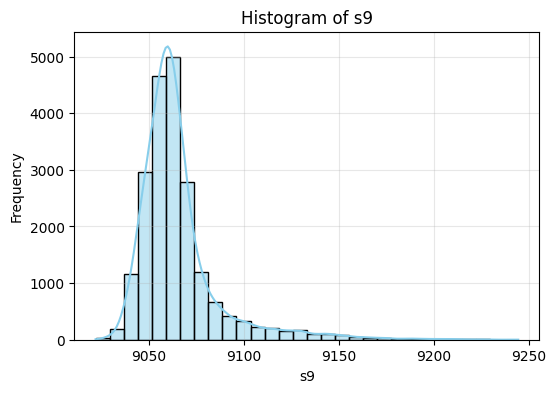

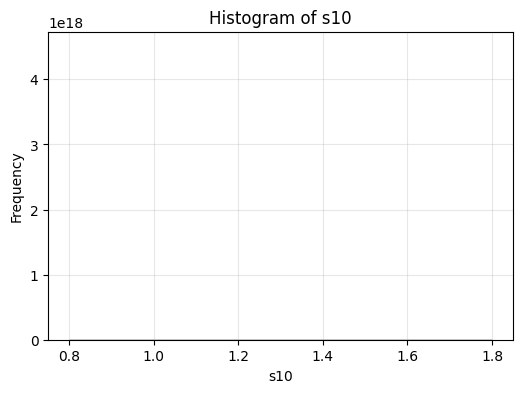

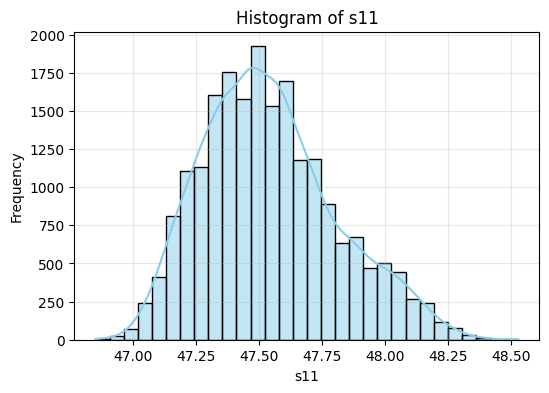

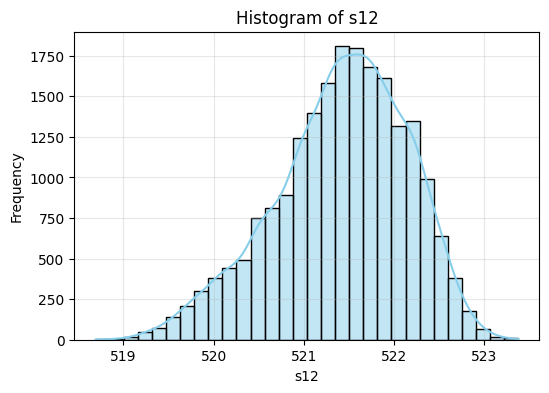

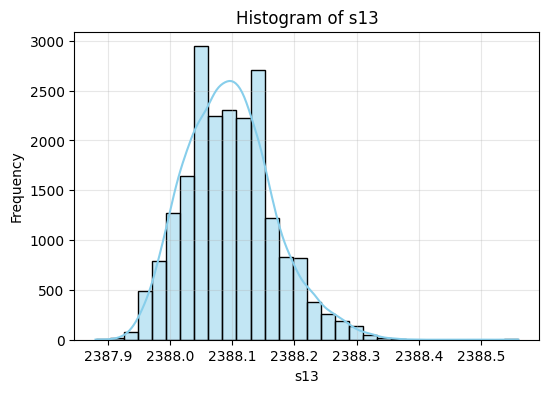

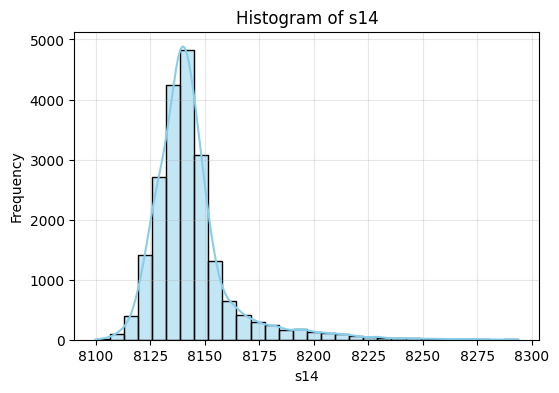

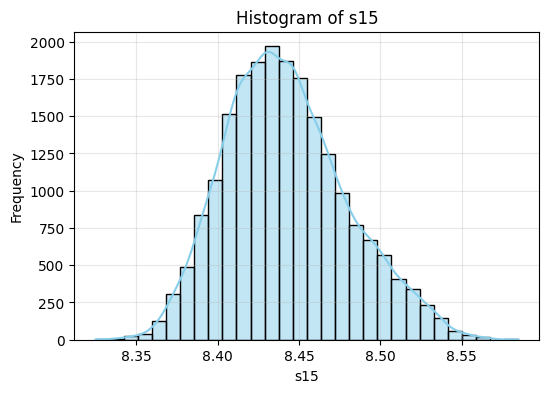

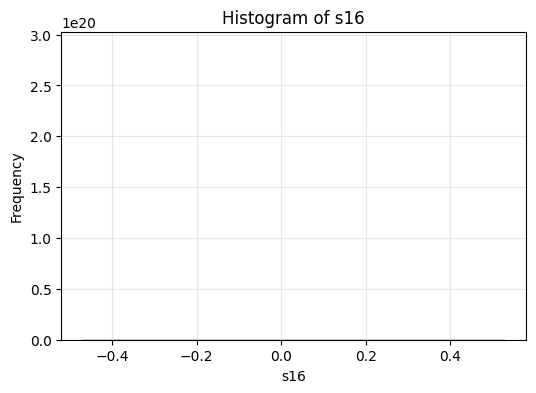

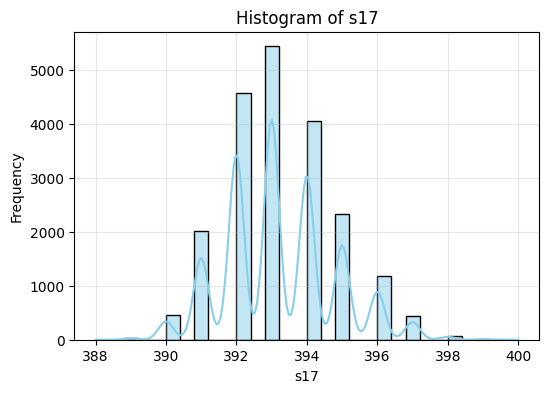

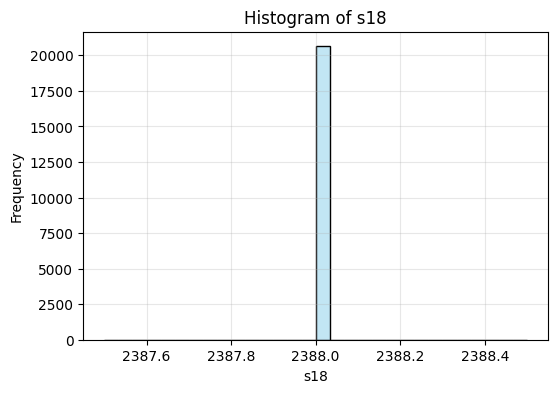

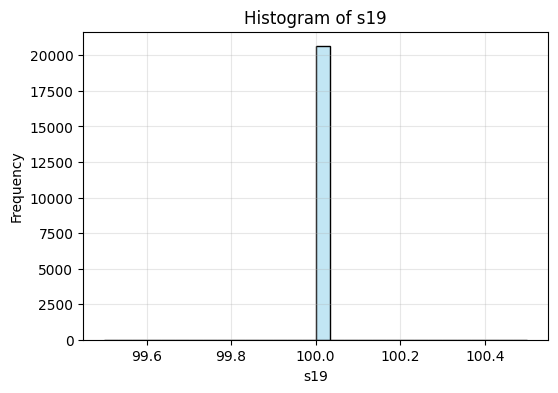

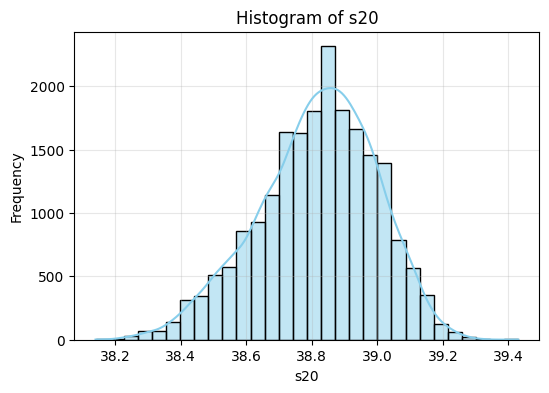

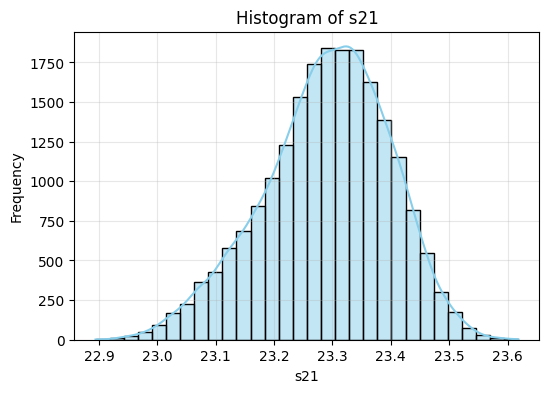

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = dfFD001.select_dtypes(include=[float, int]).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(dfFD001[col], bins=30, kde=True, color='skyblue')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(alpha=0.3)
    plt.show()


In [57]:
print(dfFD001.isnull().sum())

id                     0
cycle                  0
os1                    0
os2                    0
os3                    0
s1                     0
s2                     0
s3                     0
s4                     0
s5                     0
s6                     0
s7                     0
s8                     0
s9                     0
s10                    0
s11                    0
s12                    0
s13                    0
s14                    0
s15                    0
s16                    0
s17                    0
s18                    0
s19                    0
s20                    0
s21                    0
remaining_cycle_bin    0
dtype: int64
